Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

Precisão: 1.0


# Exercício 1

In [15]:
from sklearn.datasets import load_digits
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns


X = load_digits().data
y = load_digits().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Ajustando os parâmetros
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Treinar o modelo de busca com GridSearch
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model1 = grid_search.best_estimator_

# Salvar o melhor modelo
with open('modelo_ex1.pkl', 'wb') as pickle_file:
    pk.dump(best_model1, pickle_file)

# Fazer previsões com o melhor modelo
y_pred_best = best_model1.predict(X_test)

# Avaliar a precisão do melhor modelo
print(f'Melhores Parâmetros: {grid_search.best_params_}')

accuracy = accuracy_score(y_test, y_pred_best)
print(f'Acurácia: {accuracy}')

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Melhores Parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Acurácia: 0.8694444444444445
[[33  0  1  0  0  1  0  0  0  1]
 [ 0 32  2  0  1  0  0  0  1  1]
 [ 0  2 32  0  0  0  0  0  1  0]
 [ 0  0  0 35  0  0  0  1  0  1]
 [ 0  1  0  0 31  0  2  1  0  1]
 [ 0  0  0  1  0 34  0  0  1  0]
 [ 0  1  0  0  3  1 31  0  0  0]
 [ 0  1  0  1  1  0  0 31  2  0]
 [ 0  2  0  1  1  0  0  1 28  2]
 [ 1  3  0  1  0  2  0  2  1 26]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.76      0.86      0.81        37
           2       0.91      0.91      0.91        35
           3       0.90      0.95      0.92        37
           4       0.84      0.86      0.85        36
           5       0.89      0.94      0.92        36
           6       0.94      0.86      0.90        36
           7       0.86      0.86      0.86        36
           8       0.82      0.80      0.81        35
           

# Exercício 2

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Ajustando os parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 15, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Treinar o modelo de busca com GridSearch
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model2a = grid_search.best_estimator_

# Salvar modelo
with open('modelo_ex21a.pkl', 'wb') as pickle_file:
    pk.dump(best_model2a, pickle_file)

y_pred_best2a = best_model2a.predict(X_test)

print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Acurácia: {accuracy_score(y_test, y_pred_best2a)}')

print(confusion_matrix(y_test, y_pred_best2a))
print(classification_report(y_test, y_pred_best2a))

Melhores Parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Acurácia: 0.975
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 36  0  0  0  0]
 [ 1  1  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  1  1  0  0  0  0 32  0]
 [ 0  0  0  1  0  0  0  1  0 34]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.95      1.00      0.97        37
           2       0.97      1.00      0.99        35
           3       0.95      1.00      0.97        37
           4       0.97      0.97      0.97        36
           5       1.00      1.00      1.00        36
           6       1.00      0.94      0.97        36
           7       0.95      1.00      0.97        36
           8       1.00      0.91      0.96        35
   

## XGBoost

In [24]:
import xgboost as xgb

# Ajustando os parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 15, 25, None],
    'min_child_weight': [1, 3, 5]
    #'subsample': [0.7, 0.8, 0.9],
    #'colsample_bytree': [0.7, 0.8, 0.9],
    #'gamma': [0, 0.1, 0.2],
    #'reg_alpha': [0, 0.1, 1.0],
    #'reg_lambda': [0, 0.1, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2), param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Treinar o modelo de busca com GridSearch
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)

# Melhor modelo encontrado
best_model2b = grid_search.best_estimator_

#clf2b =  xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2) 
#model2b = clf2b.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Salvar modelo
with open('modelo_ex21b.pkl', 'wb') as pickle_file:
    pk.dump(best_model2b, pickle_file)

y_pred_best2b = best_model2b.predict(X_test)

print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Acurácia: {accuracy_score(y_test, y_pred_best2b)}')

print(confusion_matrix(y_test, y_pred_best2b))
print(classification_report(y_test, y_pred_best2b))

Melhores Parâmetros: {'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 3, 'n_estimators': 200}
Acurácia: 0.9666666666666667
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  1  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 36  0  0  0  0]
 [ 1  2  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  1  0  1  0  0 32  0]
 [ 1  0  0  1  0  0  0  1  0 33]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.93      1.00      0.96        37
           2       1.00      0.97      0.99        35
           3       0.95      1.00      0.97        37
           4       0.97      0.97      0.97        36
           5       0.97      1.00      0.99        36
           6       1.00      0.92      0.96        36
           7       0.95      1.00      0.97        36
           8       0.97      0.91      0.94     

# Exercício 3

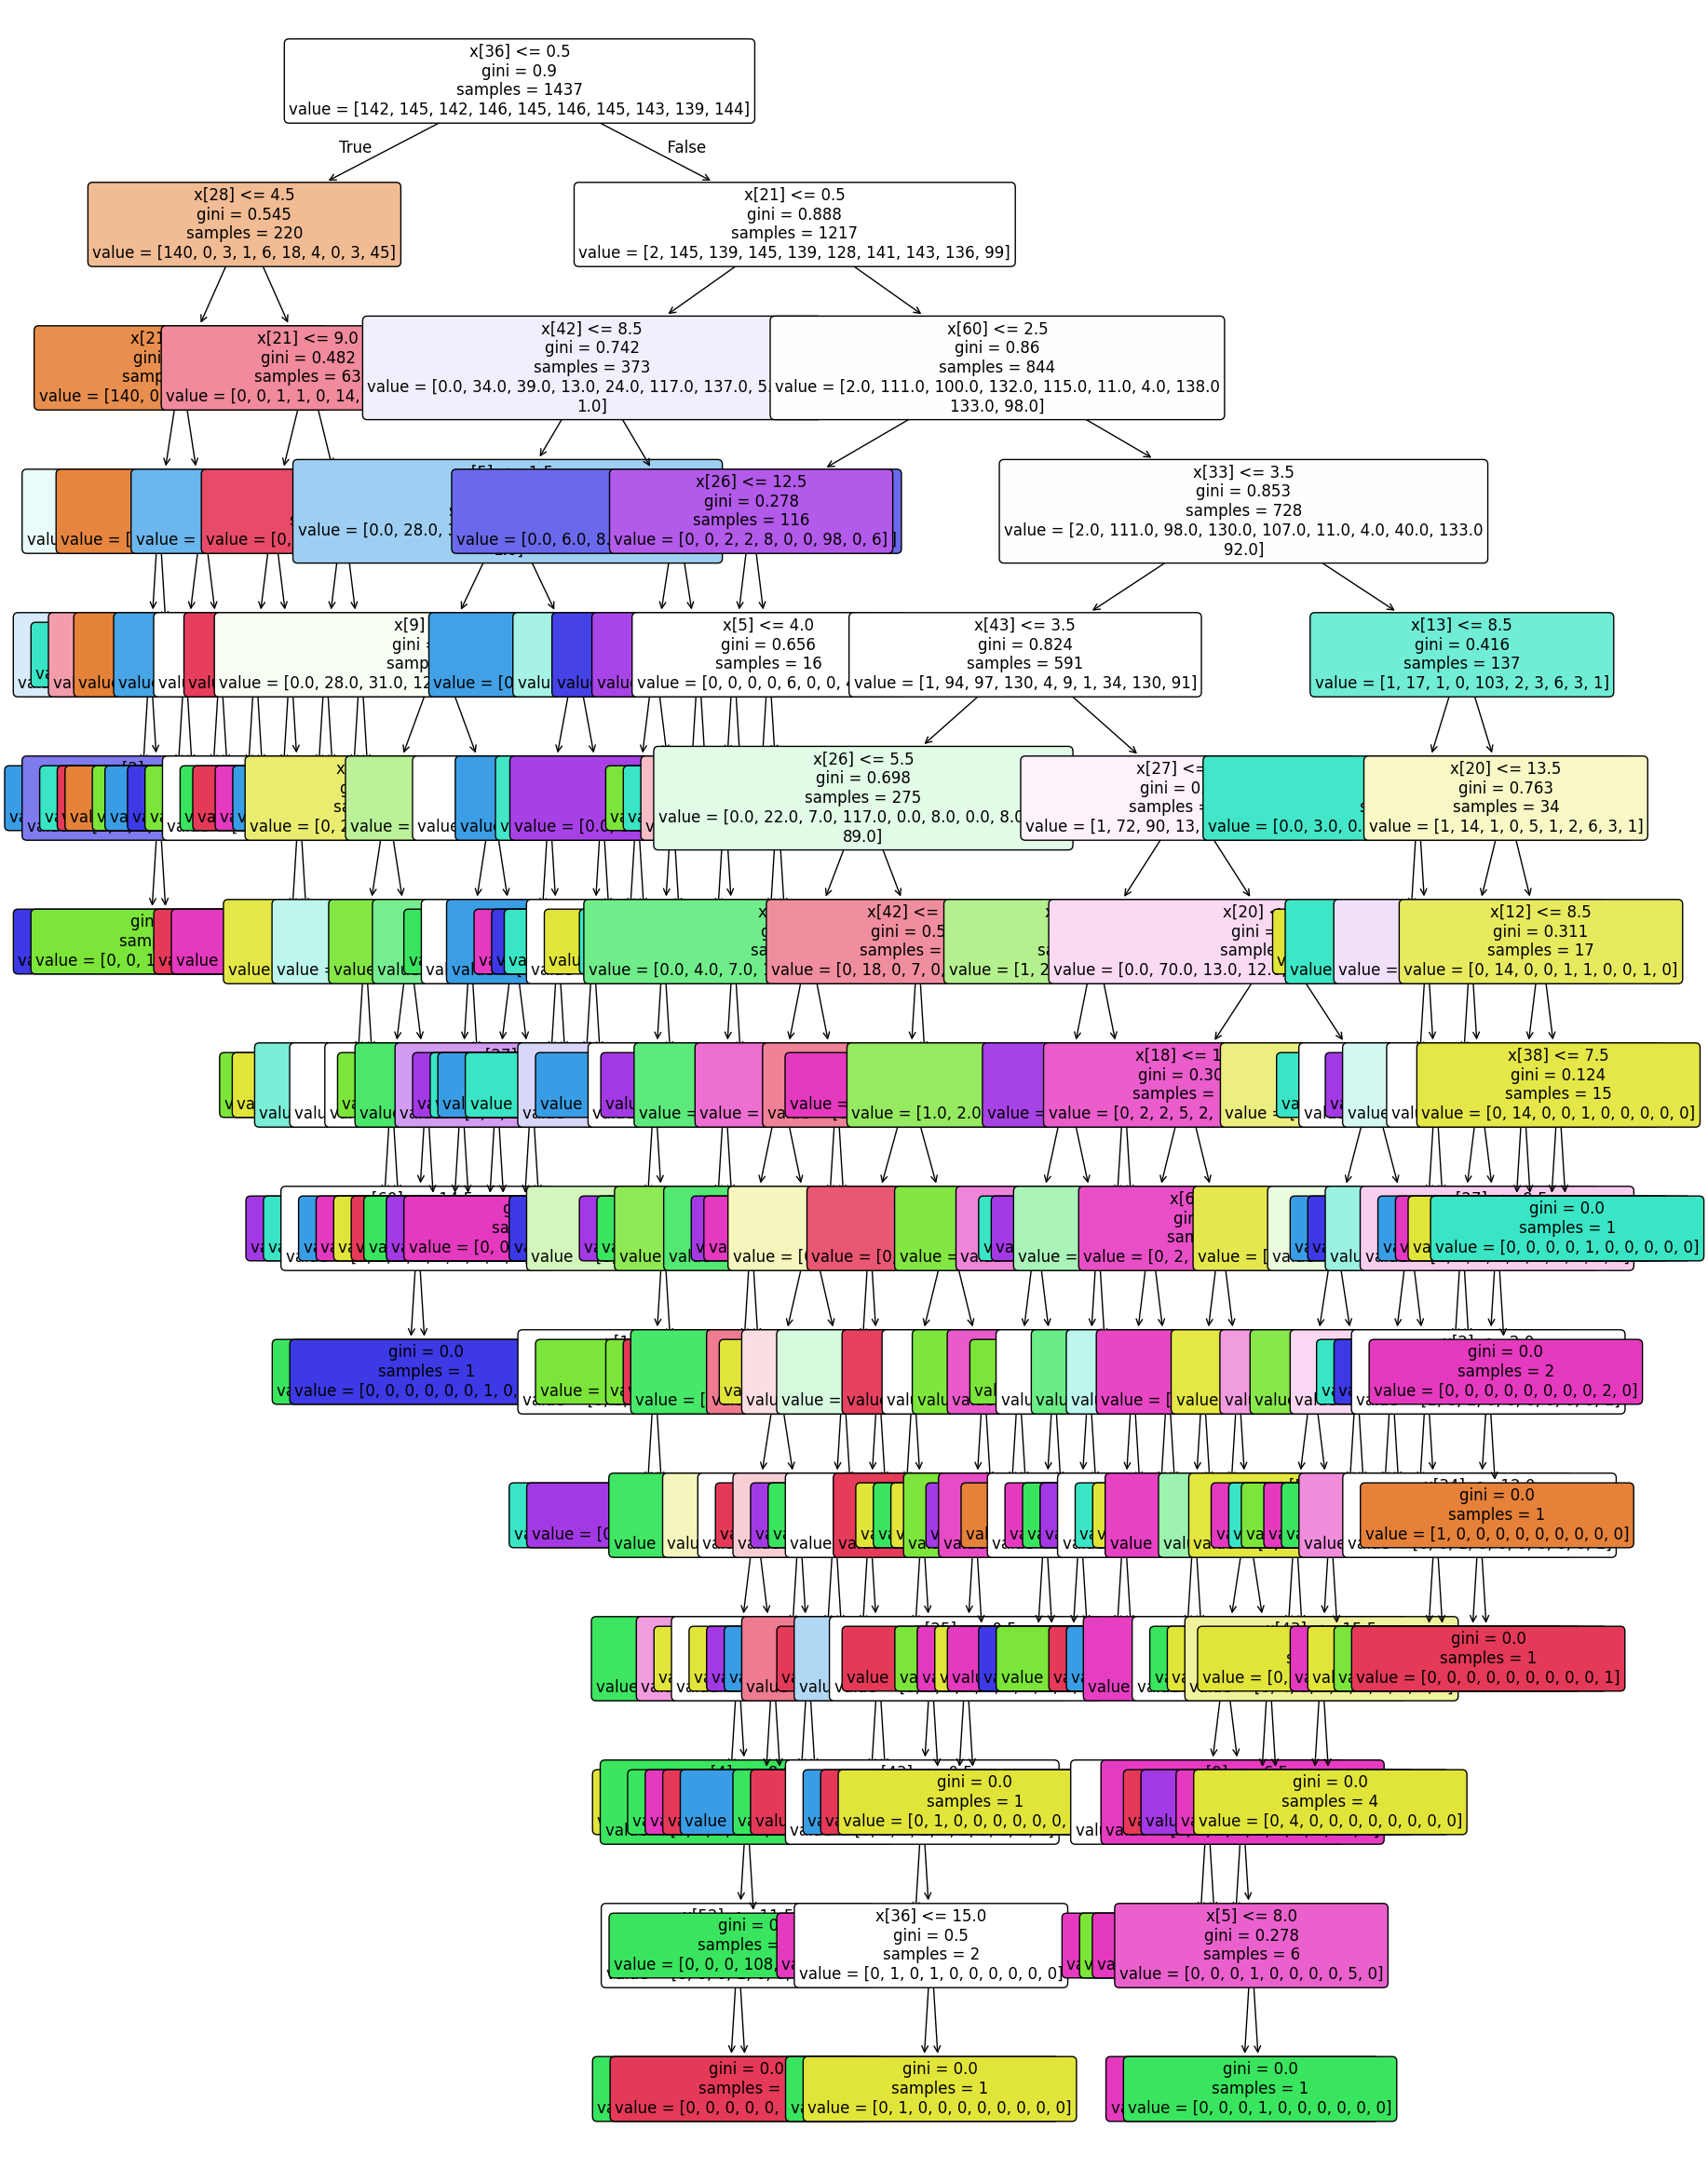

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,30))
plot_tree(best_model1,  filled=True, rounded=True, fontsize=12)
plt.show()

In [7]:
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Treinar o modelo usando o critério Gini
model_gini = tree.DecisionTreeClassifier(criterion='gini')
model_gini.fit(X_train, y_train)
y_pred_gini = model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f'Acurácia com Gini: {accuracy_gini}')

# Treinar o modelo usando o critério Entropia
model_entropy = tree.DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f'Acurácia com Entropia: {accuracy_entropy}')

Acurácia com Gini: 1.0
Acurácia com Entropia: 1.0
